# Travelling Salesman Problem (TSP)

The **Travelling Salesman Problem** is an NP-hard problem in combinatorial optimization.

### Definition

$B = E$ (Ground Set) Set of Graph's Edges

$\mathbf{H} = \{H_1, H_2, \dots, H_m\}$ (Subset System)                                    

$H_j$ Hamiltonian Cycle

Given a graph **G(V,E)** a **Hamiltonian cycle (or Hamiltonian circuit)** is a cycle that visits each vertex exactly once.

$w(H) = \sum_{(u,v)\in H}d_{uv}$ weight of $\mathbf{H}$ Hamiltonian cycle

The **TSP**'s goal is to find the Hamiltonian cycle with the least weight..

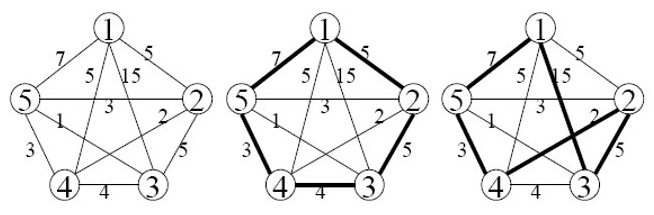
<p style="text-align: center;">Examples of Hamiltonian cycles</p>

In [23]:
import math
import random

import gurobipy as gp
import networkx as nx
import numpy as np
from gurobipy import GRB

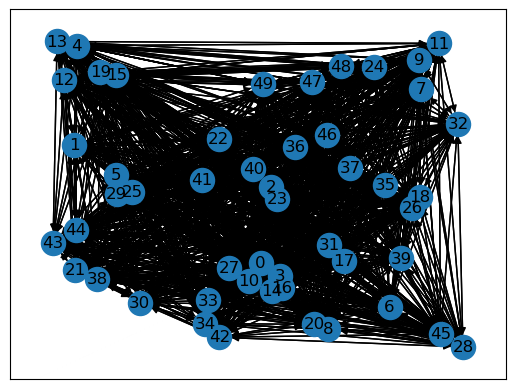

In [41]:
'''
    Generation of a complete graph with n nodes.
    
    Each node in the graph has (x,y) coordinates, where x and y are randomly generated numbers between 0 and 1
'''
n = 50
G = nx.complete_graph(n, nx.DiGraph())
my_pos = {i : (random.random(), random.random()) for i in G.nodes}
nx.draw_networkx(G, pos=my_pos, with_labels=True)

In [42]:
'''
    Euclidean distance between two graph's vertices.
'''
def euclidean_distance(x1,y1,x2,y2):
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

'''
    For each edge (i,j) that links nodes "i" and "j" in the graph,
    the cost associated with the edge is the Euclidean distance between the nodes.
'''
for i,j in G.edges:
    (x1,y1) = my_pos[i]
    (x2,y2) = my_pos[j]
    G.edges[i,j]['length'] = euclidean_distance(x1,y1,x2,y2)

## Nearest Neighbor Heuristic

In [43]:
'''
    Greedy Heuristic (Constructive) Nearest Neighbor.
    
    Build a Hamiltonian circuit starting from node 0,
    and adding to the path the nearest reachable node to the last inserted node
'''
def nearest_neighbor_heuristic(G):
    tour = [0]
    while len(tour) < n:
        i = tour[-1]
        min_length = min(G.edges[i,j]['length'] for j in G.neighbors(i) if j not in tour)
        nearest_neighbors = [j for j in G.neighbors(i) if j not in tour and G.edges[i,j]['length'] == min_length]
        tour.append(nearest_neighbors[0])
    return tour

Final tour: [0, 3, 16, 14, 10, 27, 33, 34, 42, 30, 38, 21, 43, 44, 29, 25, 5, 1, 12, 19, 15, 4, 13, 22, 40, 2, 23, 36, 46, 37, 35, 18, 26, 39, 17, 31, 6, 45, 28, 8, 20, 41, 49, 47, 48, 24, 9, 11, 7, 32]
Tour cost: 6.799850025005321


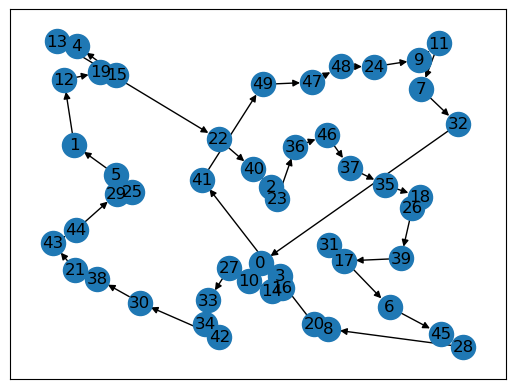

In [44]:
tour = nearest_neighbor_heuristic(G)

tour_edges = [(tour[i-1],tour[i]) for i in range(n)]
tour_cost = sum([G.edges[i,j]['length'] for (i,j) in tour_edges])

print(f'Final tour: {tour}\nTour cost: {tour_cost}')
nx.draw_networkx(G.edge_subgraph(tour_edges), pos=my_pos, with_labels=True)

## Local Search (2-opt)

Given an admissible solution for the **TSP**, if we remove two non-adjacent edges, the partial solution can be completed in two distinct ways, only one of which yields a new cycle.

Let $\mathbf{H_0} = \{(u_1,u_2), \dots, (u_{q-1}, u_q), (u_q,u_1)\}$ be a generic Hamiltonian cycle, the **2-opt** move is defined by the following operations:

1. choose a pair of non-adjacent edges $(u_i,u_{i+1})$ e $(u_j,u_{j+1})$
2. remove the edges from the cycle
3. add the two new edges $(u_i,u_{j})$ e $(u_{i+1},u_{j+1})$

The **2-opt** move is performed only if the new cycle has a lower cost than the best cycle found up to this point.

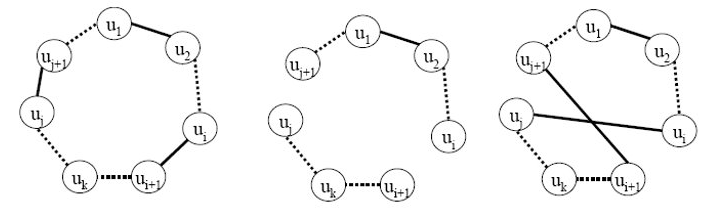
<p style="text-align: center;">2-opt move</p>

In [45]:
'''
    2-opt Heuristic (Local Search).
'''
improved = True

while improved:
    improved = False
    for i in range(n):
        for j in range(i+1,n):
            
            cur1 = (tour[i],tour[i+1])
            cur2 = (tour[j],tour[(j+1)%n])
            cur_length = G.edges[cur1]['length'] + G.edges[cur2]['length']
            
            new1 = (tour[i],tour[j])
            new2 = (tour[i+1],tour[(j+1)%n])
            new_length = G.edges[new1]['length'] + G.edges[new2]['length']
            
            if new_length < cur_length:
                print(f'Swapping edges {cur1} {cur2} with {new1} {new2}')
                tour[i+1:j+1] = tour[i+1:j+1][::-1]
                improved = True

Swapping edges (0, 3) (20, 41) with (0, 20) (3, 41)
Swapping edges (6, 31) (17, 39) with (6, 17) (31, 39)
Swapping edges (6, 17) (32, 0) with (6, 32) (17, 0)
Swapping edges (49, 41) (13, 22) with (49, 13) (41, 22)
Swapping edges (30, 42) (34, 33) with (30, 34) (42, 33)
Swapping edges (16, 3) (17, 0) with (16, 17) (3, 0)
Swapping edges (36, 23) (41, 3) with (36, 41) (23, 3)
Swapping edges (0, 20) (27, 10) with (0, 27) (20, 10)
Swapping edges (12, 19) (13, 49) with (12, 13) (19, 49)
Swapping edges (4, 15) (19, 49) with (4, 19) (15, 49)
Swapping edges (32, 6) (28, 8) with (32, 28) (6, 8)
Swapping edges (32, 28) (31, 39) with (32, 31) (28, 39)
Swapping edges (32, 31) (18, 35) with (32, 18) (31, 35)
Swapping edges (20, 10) (14, 16) with (20, 14) (10, 16)
Swapping edges (14, 10) (3, 0) with (14, 3) (10, 0)
Swapping edges (3, 23) (16, 10) with (3, 16) (23, 10)
Swapping edges (36, 41) (22, 40) with (36, 22) (41, 40)
Swapping edges (0, 27) (23, 10) with (0, 23) (27, 10)
Swapping edges (17, 16) 

Final tour: [0, 23, 2, 40, 41, 22, 36, 46, 37, 35, 31, 17, 3, 16, 14, 20, 8, 6, 45, 28, 39, 26, 18, 32, 7, 11, 9, 24, 48, 47, 49, 15, 19, 4, 13, 12, 1, 5, 25, 29, 44, 43, 21, 38, 30, 34, 42, 33, 27, 10]
Tour cost: 5.898480278378369


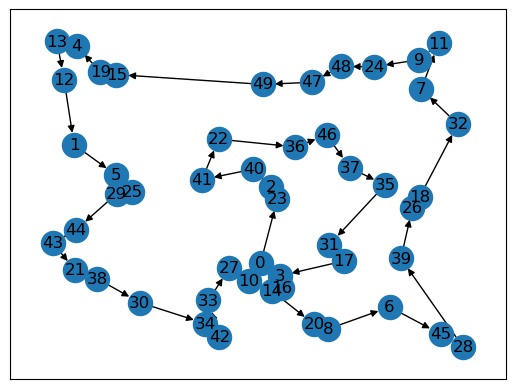

In [46]:
tour_edges = [(tour[i-1],tour[i]) for i in range(n)]
tour_cost = sum([G.edges[i,j]['length'] for (i,j) in tour_edges])

print(f'Final tour: {tour}\nTour cost: {tour_cost}')
nx.draw_networkx(G.edge_subgraph(tour_edges), pos=my_pos, with_labels=True)

## MTZ model

The **Traveling Salesman Problem** is a combinatorial optimization problem, and as such, given an appropriate formulation, can be solved using the Gurobi library.

* **Decision variables:**
    - $x_{ij}=1$ if edge $(i,j)\in A$ belongs to the minimum Hamiltonian cycle
    - $x_{ij}=1$ otherwise
 

* **Objective Function:**
    - $min \sum_{(i,j)\in A}d_{ij}x_{ij}$
    
* **Constraints**
    - $\sum_{i:(i,j)\in A}x_{ij}=1$ with $j \in V$ (for each node j exactly one ingoing edge)
    - $\sum_{i:(i,j)\in A}x_{ji}=1$ with $j \in V$ (for each node j exactly one outgoing edge)
    - Subtour Elimination Constraints

**Subtour Elimination Constraint:**

Add decision variables $u_i$ to address the visiting order of vertex $i$ in the solution.
The following constraints are added:
* $0\le u_i \le n-1$
* $u_1 = 0$
* $u_j-u_i \ge 1-n(1-x_{ij})$ with $i,j \in V, i \ne j, j \ne 1$

The following constraints are named MTZ (Muller, Tucker and Zemlin) constraints and are in polynomial number $n^2$.

In [47]:
'''
    Formulation and resolution of TSP without Subtour Elimination Constraints
'''

m = gp.Model()
x = m.addVars(G.edges,vtype=GRB.BINARY)

m.setObjective(gp.quicksum(G.edges[i,j]['length'] * x[i,j] for i,j in G.edges), GRB.MINIMIZE)

m.addConstrs(gp.quicksum(x[i,j] for i in G.predecessors(j)) == 1 for j in G.nodes)

m.addConstrs(gp.quicksum(x[i,j] for j in G.successors(i)) == 1 for i in G.nodes)

m.optimize()

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: AMD Ryzen 7 5700U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 100 rows, 2450 columns and 4900 nonzeros
Model fingerprint: 0x5df85e53
Variable types: 0 continuous, 2450 integer (2450 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-02, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 28.2681809
Presolve time: 0.01s
Presolved: 100 rows, 2450 columns, 4900 nonzeros
Variable types: 0 continuous, 2450 integer (2450 binary)

Root relaxation: objective 4.092482e+00, 71 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0       4.0924825    4.0924

Tour cost: 4.092482452465066


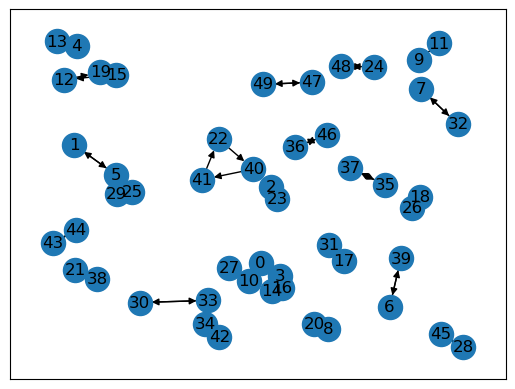

In [48]:
tour_edges = [e for e in G.edges if x[e].x > 0.5]

tour_cost = sum([G.edges[i,j]['length'] for (i,j) in tour_edges])

print(f'Tour cost: {tour_cost}')
nx.draw_networkx(G.edge_subgraph(tour_edges), pos=my_pos, with_labels=True)

In [49]:
'''
    Add MTZ constraints.
'''
u = m.addVars(G.nodes)
c = m.addConstrs(u[i] - u[j] + n * x[i,j] <= n - 1 for i,j in G.edges if j != 0)
m.optimize()

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: AMD Ryzen 7 5700U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 2501 rows, 2500 columns and 12103 nonzeros
Model fingerprint: 0xf34c71c7
Variable types: 50 continuous, 2450 integer (2450 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [3e-02, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]

MIP start from previous solve did not produce a new incumbent solution

Presolve removed 0 rows and 1 columns
Presolve time: 0.01s
Presolved: 2501 rows, 2499 columns, 12054 nonzeros
Variable types: 49 continuous, 2450 integer (2450 binary)

Root relaxation: objective 4.132264e+00, 183 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap

Tour cost: 5.623417515197157


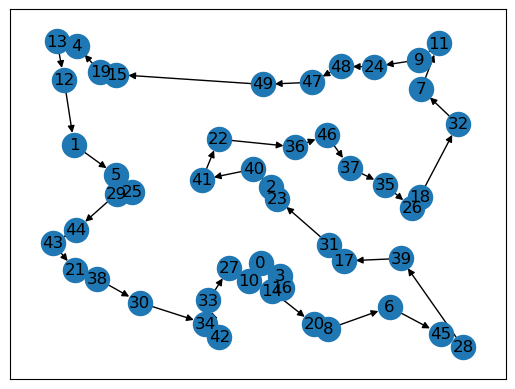

In [50]:
tour_edges = [e for e in G.edges if x[e].x > 0.5]

tour_cost = sum([G.edges[i,j]['length'] for (i,j) in tour_edges])

print(f'Tour cost: {tour_cost}')
nx.draw_networkx(G.edge_subgraph(tour_edges), pos=my_pos, with_labels=True)

## Simulated Annealing

**Simulated annealing** is a method for solving unconstrained and bound-constrained optimization problems. The method models the physical process of heating a material and then slowly lowering the temperature to decrease defects, thus minimizing the system energy.

* **Initialization:**
    - consists of finding an initial **S** solution to trigger the algorithm, in this case it was the solution found by the Nearest Neighbor algorithm
* **Defining a move:**
    - defines the operation of randomly locating a new **S'** solution in the neighborhood of the current **S** solution.
* **Move's acceptance:**
    - consists of considering whether or not to accept the **S'** solution as the new current **S** solution. The **S'** solution is accepted with probability\.
    
    $$P(acceptance) \le \begin{cases} 1 \qquad \text{ if} \quad \Delta f \le 0 \\ e^{\frac{-\Delta f}{T}} \, \quad \text{if} \quad \Delta f > 0 \end{cases}$$
    
    If $\Delta f$ is less than or equal to 0, the solution **S'** is accepted as the current solution.
    If $\Delta f$ is greater than 0, a random number between 0 and 1 is generated; if this is less than $e^{\frac{-\Delta f}{T}}$, **S'** is accepted, otherwise the current solution remains unchanged.

The initial temperature is $T = \sqrt{n}$, and the decrement law $T_{k+1} = \alpha T_k$ with $\alpha=0.999$.

NN tour: [0, 3, 16, 14, 10, 27, 33, 34, 42, 30, 38, 21, 43, 44, 29, 25, 5, 1, 12, 19, 15, 4, 13, 22, 40, 2, 23, 36, 46, 37, 35, 18, 26, 39, 17, 31, 6, 45, 28, 8, 20, 41, 49, 47, 48, 24, 9, 11, 7, 32]
Tour cost: 6.799850025005321


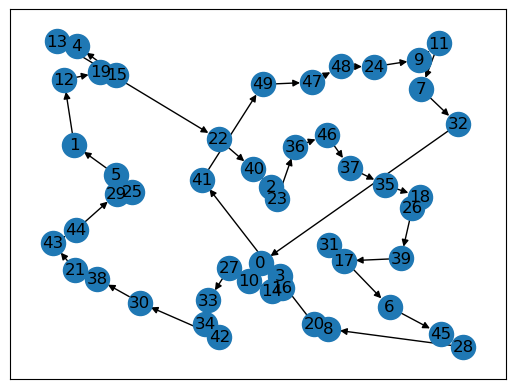

In [51]:
tour = nearest_neighbor_heuristic(G)

tour_edges = [(tour[i-1],tour[i]) for i in range(n)]
tour_cost = sum([G.edges[i,j]['length'] for (i,j) in tour_edges])

nx.draw_networkx(G.edge_subgraph(tour_edges), pos=my_pos, with_labels=True)

print(f'NN tour: {tour}\nTour cost: {tour_cost}')

In [52]:
iter = 0
stopping_iter = 1000000
alpha = 0.999
T = math.sqrt(n)
T_stop = 1e-8

while T > T_stop and iter < stopping_iter:
    candidate = tour.copy()
    i = random.randint(0,n-2)
    j = random.randint(i+1,n-1)

    candidate[i:j+1] = candidate[i:j+1][::-1]

    candidate_edges = [(candidate[i-1],candidate[i]) for i in range(n)]
    candidate_cost = sum([G.edges[i,j]['length'] for (i,j) in candidate_edges])

    tour_edges = [(tour[i-1],tour[i]) for i in range(n)]
    tour_cost = sum([G.edges[i,j]['length'] for (i,j) in tour_edges])

    if (candidate_cost < tour_cost)  or (random.random() < math.exp(-(candidate_cost - tour_cost) / T)):
        tour = candidate.copy()

    T *= alpha
    iter += 1

Final tour: [9, 11, 7, 32, 37, 35, 18, 26, 39, 17, 31, 23, 2, 0, 27, 33, 10, 14, 16, 3, 6, 45, 28, 8, 20, 42, 34, 30, 38, 21, 43, 44, 29, 5, 1, 12, 13, 4, 19, 15, 25, 41, 22, 40, 36, 46, 49, 47, 48, 24]
Tour cost: 6.353499535864299


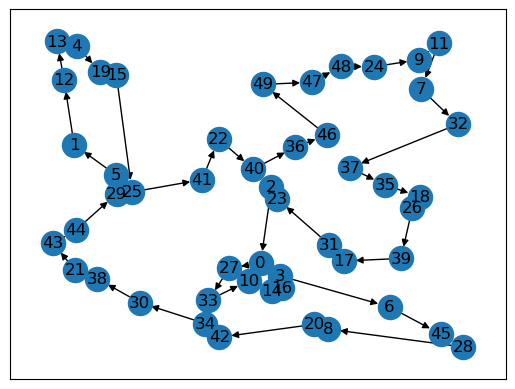

In [53]:
tour_edges = [(tour[i-1],tour[i]) for i in range(n)]
tour_cost = sum([G.edges[i,j]['length'] for (i,j) in tour_edges])

nx.draw_networkx(G.edge_subgraph(tour_edges), pos=my_pos, with_labels=True)

print(f'Final tour: {tour}\nTour cost: {tour_cost}')

## Genetic algorithm

Genetic algorithms are based on the analogy between the solution of combinatorial optimization problems and natural selection mechanisms in the genetic field.

* **Problem encoding:**
    - a solution of the problem is represented in terms of a string of decision variables by indicating the possible values of each variable. In this case, a list of nodes indicates the order in which the nodes in the graph will be visited.

* **Initialization and fitness evaluation:**
    - a set of possible solutions forming the initial population is generated and a fitness value is associated with each solution.

* **Selection**:
    - one selects pairs of individuals from the population to which to apply genetic operators (crossover and mutation).

* **Generation of new solutions:**:
    - genetic operators are applied to selected pairs of individuals in order to produce the new offspring.

* **Substitution of population individuals:**
    - one replaces existing individuals in the population with the new offspring produced in the generation step.

How does the crossover operator work in for the **TSP**?
Two crossover points in the two selected individuals are randomly chosen
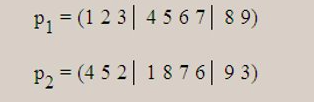

The segments between the cuts are swapped
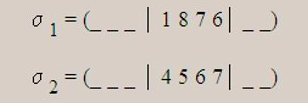
This step defines the following correspondences between the nodes:
<p style="text-align: center;">1 <-> 4 | 8 <-> 5 | 7 <-> 6 | 6 <-> 7</p>

The offspring will be:
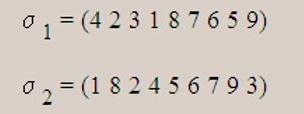

This procedure is called **Partially Mapped Crossover (PMX).**

In [54]:
'''
    Initialization and fitness evaluation
    
    The population is randomly generated and sorted by fitness value.
'''
def generate_population(graph, size):
    population = []
    nodes = list(graph.nodes())

    for _ in range(size):
        element = nodes.copy()
        random.shuffle(element)
        dist = sum([graph.edges[element[i-1], element[i]]['length'] for i in range(len(element))])
        population.append([element, dist])
    
    population.sort(key=lambda x : x[1])
    
    return population

In [55]:
def parent_selection(population):
    cum_fit = []
    
    F = sum([1/element[1] for element in population]) + 1e-7
    
    for i in range(len(population)):
        fit_i = sum([1/element[1] for element in population[:i+1]]) / F
        cum_fit.append(fit_i)
    
    a, b = random.random(), random.random() 
    
    for i in range(len(population)):
        ub = cum_fit[i]
        lb = cum_fit[i-1] if i > 0 else 0
        if ub > a and lb <= a:
            parent_a = i
    
    for i in range(len(population)):
        ub = cum_fit[i]
        lb = cum_fit[i-1] if i > 0 else 0
        if ub > b and lb <= b:
            parent_b = i
    
    return population[parent_a], population[parent_b]

In [ ]:
MUTATION_RATE = 0.1
s = 100
stopping_iter = 2000

population = generate_population(G, s)

for _ in range(stopping_iter):
    
    # Parent's selection
    parent_a, parent_b = parent_selection(population)
    parent_a, parent_b = np.array(parent_a[0]), np.array(parent_b[0])

    parent_size = len(parent_a)

    # Crossover
    left = random.randint(0,parent_size-3)
    right = random.randint(left+1,parent_size-2)

    slice_a = parent_a[left+1:right+1]
    slice_b = parent_b[left+1:right+1]

    a_to_b = {slice_b[i] : slice_a[i] for i in range(len(slice_b))}
    b_to_a = {slice_a[i] : slice_b[i] for i in range(len(slice_a))}

    child_a = np.copy(parent_b)
    child_b = np.copy(parent_a)

    child_a[:left+1] = -1
    child_a[right+1:] = -1

    child_b[:left+1] = -1
    child_b[right+1:] = -1

    # PMX (Partially Mapped Crossover)
    for i in range(parent_size):
        if i < left+1 or i > right:
            new_node = parent_a[i]
            while new_node in child_a:
                if new_node in a_to_b:
                    new_node = a_to_b[new_node]
                else:
                    new_node = b_to_a[new_node]
            child_a[i] = new_node
            new_node = parent_b[i]
            while new_node in child_b:
                if new_node in b_to_a:
                    new_node = b_to_a[new_node]
                else:
                    new_node = a_to_b[new_node]
            child_b[i] = new_node

    # Mutation
    if random.random() < MUTATION_RATE:
        i = random.randint(0, len(child_a)-1)
        j = random.randint(0, len(child_a)-1)
        child_a[i], child_a[j] = child_a[j], child_a[i]
        i = random.randint(0, len(child_b)-1)
        j = random.randint(0, len(child_b)-1)
        child_b[i], child_b[j] = child_b[j], child_b[i]

    # Individual's substitution
    population = population[:-2] + [[child_a, sum([G.edges[child_a[i-1], child_a[i]]['length'] for i in range(len(child_a))])],
                [child_b, sum([G.edges[child_b[i-1], child_b[i]]['length'] for i in range(len(child_b))])]]

    population.sort(key=lambda x : x[1])

In [ ]:
tour = population[0][0]
tour_edges = [(tour[i-1],tour[i]) for i in range(n)]
tour_cost = sum([G.edges[i,j]['length'] for (i,j) in tour_edges])

nx.draw_networkx(G.edge_subgraph(tour_edges), pos=my_pos, with_labels=True)

print(f'Final tour: {tour}\nTour cost: {tour_cost}')